**RQ3: How do self-rated poverty trends compare before, during, and after economic crises (e.g., 2008 global financial crisis, COVID-19 pandemic)?**

**Importing Necessary Libraries**

In [1]:

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


**Plot and Design Setting**

In [2]:
# Color settings
colors = ["#648FFF", "#785EF0", "#A11C5D", "#FE6100", "#FFB000", "#000000", "#FFFFFF"]
colors_grad = sns.color_palette('flare_r', 12)
colors_heat1 = sns.color_palette('flare_r', as_cmap=True)
colors_heat2 = sns.diverging_palette(315, 261, s=74, l=50, center='dark', as_cmap=True)
color_bg = "#1B181C"
color_text = "#FFFFFF"

# Plot settings
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams["figure.figsize"] = (20, 8)
mpl.rcParams['font.family'] = 'Roboto'
mpl.rcParams['figure.titlesize'] = 32
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['axes.titlepad'] = 72
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['xtick.minor.width'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['ytick.minor.width'] = 0
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False
mpl.rcParams['legend.title_fontsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['legend.frameon'] = False
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'
mpl.rcParams["figure.facecolor"] = color_bg
mpl.rcParams["axes.facecolor"] = color_bg
mpl.rcParams["savefig.facecolor"] = color_bg
mpl.rcParams['text.color'] = color_text
mpl.rcParams['axes.labelcolor'] = color_text
mpl.rcParams['xtick.color'] = color_text
mpl.rcParams['ytick.color'] = color_text
mpl.rcParams['axes.edgecolor'] = color_text

**Data Preprocessing and Extraction**

In [3]:
# Load Dataset and Data Cleaning
poverty_data = pd.read_csv("../dataset/CS132_DataSheet-graph_data.csv")
poverty_data['Year'] = poverty_data['Year'].ffill() + (poverty_data['Month Only'] / 12)

In [4]:
# Extract data
x = poverty_data['Year']
y_poor = poverty_data['Poor Respondent Count']
y_not_poor = poverty_data['Not Poor Respondent Count']
y_borderline = poverty_data['Borderline Respondent Count']

**Data Standardization**

In [5]:
# Data Split and Reshape
# Poor
X_train_poor, X_test_poor, Y_train_poor, Y_test_poor = train_test_split(x, y_poor, test_size=0.5, random_state=42)
X_train_poor = np.array(X_train_poor).reshape(-1, 1)
X_test_poor = np.array(X_test_poor).reshape(-1, 1)
Y_test_poor = np.array(Y_test_poor)

# Not Poor
X_train_not_poor, X_test_not_poor, Y_train_not_poor, Y_test_not_poor = train_test_split(x, y_not_poor, test_size=0.5, random_state=42)
X_train_not_poor = np.array(X_train_not_poor).reshape(-1, 1)
X_test_not_poor = np.array(X_test_not_poor).reshape(-1, 1)
Y_test_not_poor = np.array(Y_test_not_poor)

# Borderline
X_train_borderline, X_test_borderline, Y_train_borderline, Y_test_borderline = train_test_split(x, y_borderline, test_size=0.5, random_state=42)
X_train_borderline = np.array(X_train_borderline).reshape(-1, 1)
X_test_borderline = np.array(X_test_borderline).reshape(-1, 1)
Y_test_borderline = np.array(Y_test_borderline)

**Regrssion Model Training**

In [6]:
# Regression Models
# Poor
model_poor = linear_model.LinearRegression()
model_poor.fit(X_train_poor, Y_train_poor)
Y_pred_poor = model_poor.predict(X_test_poor)

# Not Poor
model_not_poor = linear_model.LinearRegression()
model_not_poor.fit(X_train_not_poor, Y_train_not_poor)
Y_pred_not_poor = model_not_poor.predict(X_test_not_poor)

# Borderline
model_borderline = linear_model.LinearRegression()
model_borderline.fit(X_train_borderline, Y_train_borderline)
Y_pred_borderline = model_borderline.predict(X_test_borderline)

# Polynomial Regression Models
degree = 3  # Degree of the polynomial

# Poor
poly_model_poor = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
poly_model_poor.fit(X_train_poor, Y_train_poor)
y_pred_poor_poly = poly_model_poor.predict(X_test_poor)

# Not Poor
poly_model_not_poor = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
poly_model_not_poor.fit(X_train_not_poor, Y_train_not_poor)
y_pred_not_poor_poly = poly_model_not_poor.predict(X_test_not_poor)

# Borderline
poly_model_borderline = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
poly_model_borderline.fit(X_train_borderline, Y_train_borderline)
y_pred_borderline_poly = poly_model_borderline.predict(X_test_borderline)

**Regression Metrics**

In [7]:
# Print Regression Metrics
print("Poor:")
print(f"Coefficient: {model_poor.coef_[0]:.2f}")
print(f"Intercept: {model_poor.intercept_:.2f}")
print(f"Mean Squared Error: {mean_squared_error(Y_test_poor, Y_pred_poor):.2f}")
print(f"R-squared: {r2_score(Y_test_poor, Y_pred_poor):.2f}")
print(f"Mean Squared Error (Poly): {mean_squared_error(Y_test_poor, y_pred_poor_poly):.2f}")
print(f"R-squared (Poly): {r2_score(Y_test_poor, y_pred_poor_poly):.2f}")
print("\nNot Poor:")
print(f"Coefficient: {model_not_poor.coef_[0]:.2f}")
print(f"Intercept: {model_not_poor.intercept_:.2f}")
print(f"Mean Squared Error: {mean_squared_error(Y_test_not_poor, Y_pred_not_poor):.2f}")
print(f"R-squared: {r2_score(Y_test_not_poor, Y_pred_not_poor):.2f}")
print(f"Mean Squared Error (Poly): {mean_squared_error(Y_test_not_poor, y_pred_not_poor_poly):.2f}")
print(f"R-squared (Poly): {r2_score(Y_test_not_poor, y_pred_not_poor_poly):.2f}")
print("\nBorderline:")
print(f"Coefficient: {model_borderline.coef_[0]:.2f}")
print(f"Intercept: {model_borderline.intercept_:.2f}")
print(f"Mean Squared Error: {mean_squared_error(Y_test_borderline, Y_pred_borderline):.2f}")
print(f"R-squared: {r2_score(Y_test_borderline, Y_pred_borderline):.2f}")
print(f"Mean Squared Error (Poly): {mean_squared_error(Y_test_borderline, y_pred_borderline_poly):.2f}")
print(f"R-squared (Poly): {r2_score(Y_test_borderline, y_pred_borderline_poly):.2f}")

Poor:
Coefficient: -6.12
Intercept: 12928.45
Mean Squared Error: 4640.55
R-squared: 0.50
Mean Squared Error (Poly): 3776.55
R-squared (Poly): 0.59

Not Poor:
Coefficient: 4.05
Intercept: -7892.84
Mean Squared Error: 2608.98
R-squared: 0.52
Mean Squared Error (Poly): 2623.14
R-squared (Poly): 0.52

Borderline:
Coefficient: 2.06
Intercept: -3835.61
Mean Squared Error: 6611.97
R-squared: 0.02
Mean Squared Error (Poly): 5927.41
R-squared (Poly): 0.12


**Data Plotting**

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

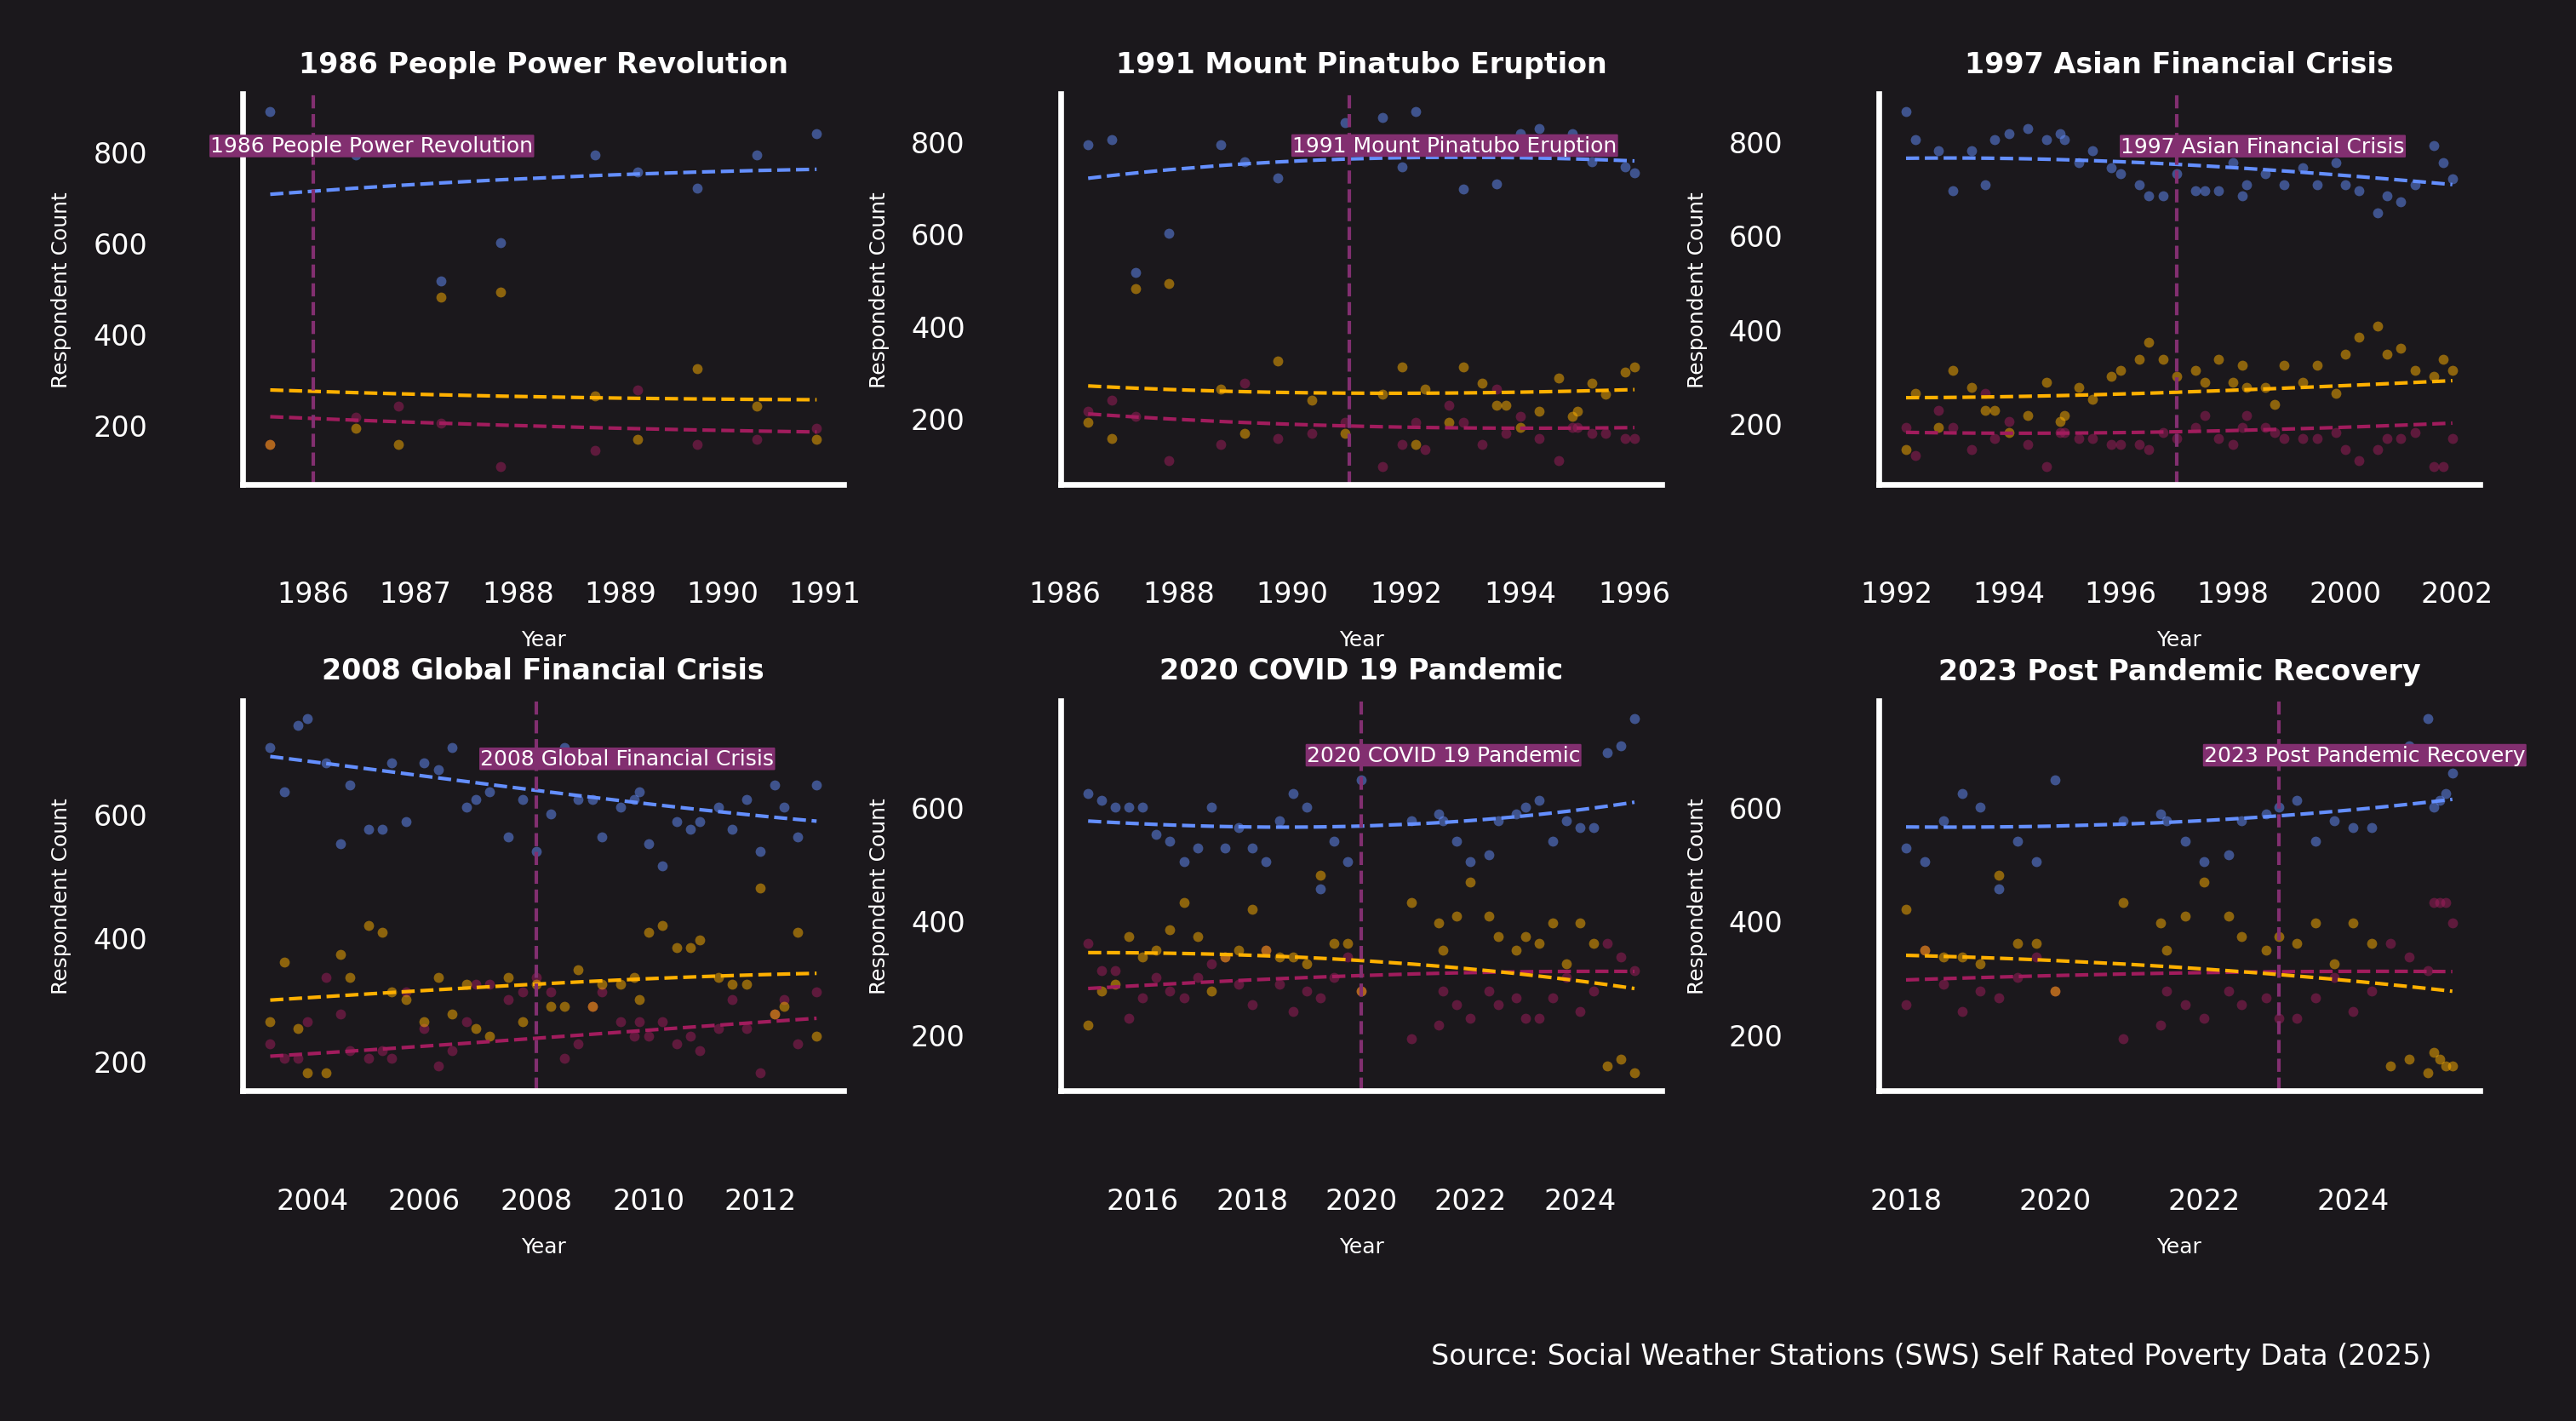

<Figure size 12000x4800 with 0 Axes>

<Figure size 12000x4800 with 0 Axes>

In [48]:
# Define events and their years
events = {
    "1986 People Power Revolution": 1986,
    "1991 Mount Pinatubo Eruption": 1991,
    "1997 Asian Financial Crisis": 1997,
    "2008 Global Financial Crisis": 2008,
    "2020 COVID 19 Pandemic": 2020,
    "2023 Post Pandemic Recovery": 2023
}

# Create subplots for all events
num_events = len(events)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(5, 2.5))  # Smaller figure size with 3 rows and 2 columns
axes = axes.flatten()

for i, (event_name, event_year) in enumerate(events.items()):
    ax = axes[i]

    # Filter data around the event year (±5 years to ensure at least 10 data points)
    filtered_data = poverty_data[(poverty_data['Year'] >= event_year - 5) & (poverty_data['Year'] <= event_year + 5)]
    x_filtered = filtered_data['Year']
    y_poor_filtered = filtered_data['Poor Respondent Count']
    y_not_poor_filtered = filtered_data['Not Poor Respondent Count']
    y_borderline_filtered = filtered_data['Borderline Respondent Count']

    # Scatter plots
    scatter_poor = ax.scatter(x_filtered, y_poor_filtered, color=colors[0], alpha=0.5, s=2, label='Poor')  # Smaller points
    scatter_not_poor = ax.scatter(x_filtered, y_not_poor_filtered, color=colors[2], alpha=0.5, s=2, label='Not Poor')
    scatter_borderline = ax.scatter(x_filtered, y_borderline_filtered, color=colors[4], alpha=0.5, s=2, label='Borderline')

    # Polynomial regression lines
    x_filtered_reshaped = np.array(x_filtered).reshape(-1, 1)
    y_poor_poly = poly_model_poor.predict(x_filtered_reshaped)
    y_not_poor_poly = poly_model_not_poor.predict(x_filtered_reshaped)
    y_borderline_poly = poly_model_borderline.predict(x_filtered_reshaped)

    line_poor = ax.plot(x_filtered, y_poor_poly, color=colors[0], linestyle='--', linewidth=0.5, label='Poor (Poly)')  # Thinner lines
    line_not_poor = ax.plot(x_filtered, y_not_poor_poly, color=colors[2], linestyle='--', linewidth=0.5, label='Not Poor (Poly)')
    line_borderline = ax.plot(x_filtered, y_borderline_poly, color=colors[4], linestyle='--', linewidth=0.5, label='Borderline (Poly)')

    # Highlight the event year
    ax.axvline(x=event_year, color=colors_grad[2], linestyle='--', linewidth=0.5)
    ax.annotate(
        event_name,
        xy=(event_year, max(y_poor_filtered.max(), y_not_poor_filtered.max(), y_borderline_filtered.max()) * 0.9),
        xytext=(event_year - 1, max(y_poor_filtered.max(), y_not_poor_filtered.max(), y_borderline_filtered.max()) * 0.9),
        arrowprops=dict(facecolor=colors_grad[2], arrowstyle='->', lw=0.5),
        fontsize=3,
        bbox=dict(boxstyle='round,pad=0.05', edgecolor='white', facecolor=colors_grad[2])
    )

    # Customize the subplot
    ax.set_xlabel('Year', fontsize=3, labelpad=3)
    ax.set_ylabel('Respondent Count', fontsize=3, labelpad=3)
    ax.set_title(event_name, fontdict={'family': 'Roboto', 'weight': 'bold', 'size': 4}, pad=3)
    ax.tick_params(axis='both', which='major', labelsize=4)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better fit
plt.tight_layout(pad=0.5, h_pad=0.1, w_pad=0.1)  # Compress spacing further

# Source text
plt.figtext(0.75, -0.05, 'Source: Social Weather Stations (SWS) Self Rated Poverty Data (2025)', ha='center', va='center', fontsize=4)


# Save the combined plot
plt.savefig('../plot_results/RQ3_events_combined_plot_screen_compressed.png', dpi=300)

# Show the combined plot
plt.show()

# Create the combined plot
plt.figure()
